# Data Science 1 - Final Project
## 
## Risk Management

In [51]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
# import time
from IPython.display import Image
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from structured import *

In [52]:
path = 'data/'
brrower_data = pd.read_csv(path + 'borrower_table.csv')
brrower_data.shape
brrower_data.head(10)

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   
5   423171              1                          NaN   
6   568977              1                          NaN   
7   200139              1                          NaN   
8   991294              0                          1.0   
9   875332              0                          1.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   
5                             NaN                     6100   
6                             NaN                      600   
7                             NaN                     4000   
8                             0.0                     7000   
9                             0.0                     4300   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   
5                                             0.53           6163   
6                                             0.89            305   
7                                             0.57            602   
8                                             0.52           2575   
9                                             0.83            722   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             1073            0              0   47                 3  
1             5299            1          13500   33                 1  
2             3422            1          24500   38                 8  
3             3388            0              0   24                 1  
4             4282            1          18100   36                 1  
5             5298            1          29500   24                 1  
6             1456            0              0   50                 2  
7             2757            1          31700   36                 8  
8             2917            1          58900   33                 3  
9              892            1           5400   32                 7

In [53]:
loan_data = pd.read_csv(path + 'loan_table.csv')
loan_data.head()

loan_id loan_purpose        date  loan_granted  loan_repaid
0    19454   investment  2012-03-15             0          NaN
1   496811   investment  2012-01-17             0          NaN
2   929493        other  2012-02-09             0          NaN
3   580653        other  2012-06-27             1          1.0
4   172419     business  2012-05-21             1          0.0

In [54]:
merge_data = pd.merge(brrower_data, loan_data, how='inner',on='loan_id')
merge_data.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   

      loan_purpose        date  loan_granted  loan_repaid  
0         business  2012-01-31             0          NaN  
1       investment  2012-11-02             0          NaN  
2            other  2012-07-16             1          1.0  
3       investment  2012-06-05             0          NaN  
4  emergency_funds  2012-11-28             0          NaN

In [55]:
#merge_data.info()

In [56]:
# Column with null value
merge_data.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
dtype: int64

In [57]:
# Neu la nhan vien thi se co kha nang duoc vay cao hon
merge_data[['is_employed', 'loan_granted']].groupby(['is_employed'], as_index=False).mean().sort_values(by='loan_granted', ascending=False)

is_employed  loan_granted
1            1      0.651084
0            0      0.124522

In [58]:

merge_data[['fully_repaid_previous_loans', 'loan_granted']].groupby(['fully_repaid_previous_loans'], as_index=False).mean().sort_values(by='loan_granted', ascending=False)

fully_repaid_previous_loans  loan_granted
1                          1.0      0.475437
0                          0.0      0.458692

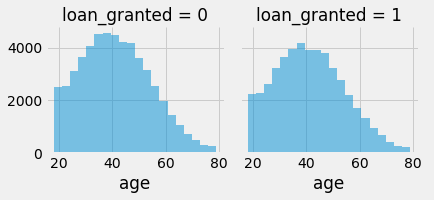

In [59]:

g = sns.FacetGrid(merge_data, col='loan_granted')
g.map(plt.hist, 'age', alpha=.5, bins=20)
g.add_legend()

In [61]:
#display_all(merge_data.describe(include='all').T)
# complete or delete missing values in dataset
merge_data['currently_repaying_other_loans'].fillna(0, inplace = True)
merge_data['fully_repaid_previous_loans'].fillna(1, inplace = True)
merge_data['avg_percentage_credit_card_limit_used_last_year'].fillna(merge_data['avg_percentage_credit_card_limit_used_last_year'].mode()[0], inplace=True)

In [62]:

train_cats(merge_data)

In [63]:
merge_data.loan_purpose.cat.categories

Index(['business', 'emergency_funds', 'home', 'investment', 'other'], dtype='object')

In [64]:
merge_data.loan_purpose = merge_data.loan_purpose.cat.codes

In [65]:
merge_data.head(10)

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          1.0   
1   482590              0                          1.0   
2   135565              1                          1.0   
3   207797              0                          1.0   
4   828078              0                          0.0   
5   423171              1                          1.0   
6   568977              1                          1.0   
7   200139              1                          1.0   
8   991294              0                          1.0   
9   875332              0                          1.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             0.0                     8000   
1                             0.0                     4500   
2                             0.0                     6900   
3                             0.0                     1200   
4                             0.0                     6900   
5                             0.0                     6100   
6                             0.0                      600   
7                             0.0                     4000   
8                             0.0                     7000   
9                             0.0                     4300   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   
5                                             0.53           6163   
6                                             0.89            305   
7                                             0.57            602   
8                                             0.52           2575   
9                                             0.83            722   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   
5             5298            1          29500   24                 1   
6             1456            0              0   50                 2   
7             2757            1          31700   36                 8   
8             2917            1          58900   33                 3   
9              892            1           5400   32                 7   

   loan_purpose        date  loan_granted  loan_repaid  
0             0  2012-01-31             0          NaN  
1             3  2012-11-02             0          NaN  
2             4  2012-07-16             1          1.0  
3             3  2012-06-05             0          NaN  
4             1  2012-11-28             0          NaN  
5             4  2012-11-07             1          1.0  
6             1  2012-10-12             0          NaN  
7             0  2012-09-19             1          0.0  
8             1  2012-12-04             1          1.0  
9             0  2012-01-20             1          1.0

In [66]:
def profitability(row):
    if row['loan_granted'] == 0:
        return 0
    else:
        if row['loan_repaid'] == 1.0:
            return 1
        else:
            return -1

In [67]:
merge_data['profitability'] = merge_data.apply(lambda row: profitability(row), axis =1)

In [68]:
merge_data.head(10)

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          1.0   
1   482590              0                          1.0   
2   135565              1                          1.0   
3   207797              0                          1.0   
4   828078              0                          0.0   
5   423171              1                          1.0   
6   568977              1                          1.0   
7   200139              1                          1.0   
8   991294              0                          1.0   
9   875332              0                          1.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             0.0                     8000   
1                             0.0                     4500   
2                             0.0                     6900   
3                             0.0                     1200   
4                             0.0                     6900   
5                             0.0                     6100   
6                             0.0                      600   
7                             0.0                     4000   
8                             0.0                     7000   
9                             0.0                     4300   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   
5                                             0.53           6163   
6                                             0.89            305   
7                                             0.57            602   
8                                             0.52           2575   
9                                             0.83            722   

   checking_amount  is_employed  yearly_salary  age  dependent_number  \
0             1073            0              0   47                 3   
1             5299            1          13500   33                 1   
2             3422            1          24500   38                 8   
3             3388            0              0   24                 1   
4             4282            1          18100   36                 1   
5             5298            1          29500   24                 1   
6             1456            0              0   50                 2   
7             2757            1          31700   36                 8   
8             2917            1          58900   33                 3   
9              892            1           5400   32                 7   

   loan_purpose        date  loan_granted  loan_repaid  profitability  
0             0  2012-01-31             0          NaN              0  
1             3  2012-11-02             0          NaN              0  
2             4  2012-07-16             1          1.0              1  
3             3  2012-06-05             0          NaN              0  
4             1  2012-11-28             0          NaN              0  
5             4  2012-11-07             1          1.0              1  
6             1  2012-10-12             0          NaN              0  
7             0  2012-09-19             1          0.0             -1  
8             1  2012-12-04             1          1.0              1  
9             0  2012-01-20             1          1.0              1

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
# old model
train_data = merge_data.drop(['loan_id','loan_granted','date','loan_repaid','profitability'], axis=1)
label = merge_data['loan_granted']

X_train, X_test, y_train, y_test = train_test_split(train_data,label,test_size=0.3)


dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print('Decision tree accuracy score: ',dt_clf.score(X_test,y_test))


Decision tree accuracy score:  0.6541378173425652


In [96]:
#new model with profitability feature
train2_data = merge_data.drop(['loan_id','loan_granted','date','loan_repaid','profitability', 'loan_purpose'], axis=1)
label2 = merge_data['loan_granted']

X2_train, X2_test, y2_train, y2_test = train_test_split(train2_data,label2,test_size=0.3)



dt_clf2 = DecisionTreeClassifier()
dt_clf2.fit(X2_train, y2_train)
print('Decision tree accuracy score: ',dt_clf2.score(X2_test,y2_test))

Decision tree accuracy score:  0.6611605670952851
